# AC_offset_quasars 

Here we test the CRTS-SDSS offset by considering three last seasons of SDSS, which overlap with CRTS. We consider only quasars where all have both number of SDSS and CRTS points is bigger than $N_{min}$ (eg.>3). For the $i$-th season, we calculate 

$\Delta_{i} = median(SDSS) - median(CRTS)$

so that the mean per QSO is 

$\bar{\Delta} = \sum_{i}^{3}{ \left( \Delta_{i} / 3 \right) }$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [3]:
# Read in the table with CRTS-SDSS QSO light curves ...
summary = Table.read('summary_combined_lc_info.txt', format='ascii') 

In [7]:
summary.sort('CRTS_wN')

In [8]:
summary

lcname,SDSS_uN,SDSS_medianuerr,SDSS_medianumag,SDSS_gN,SDSS_mediangerr,SDSS_mediangmag,SDSS_rN,SDSS_medianrerr,SDSS_medianrmag,SDSS_iN,SDSS_medianierr,SDSS_medianimag,SDSS_zN,SDSS_medianzerr,SDSS_medianzmag,PS1_gN,PS1_mediangerr,PS1_mediangmag,PS1_rN,PS1_medianrerr,PS1_medianrmag,PS1_iN,PS1_medianierr,PS1_medianimag,PS1_zN,PS1_medianzerr,PS1_medianzmag,PS1_yN,PS1_medianyerr,PS1_medianymag,PTF_1N,PTF_median1err,PTF_median1mag,PTF_2N,PTF_median2err,PTF_median2mag,CRTS_wN,CRTS_medianwerr,CRTS_medianwmag
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1862222.txt,48.0,0.1235,21.04,49.0,0.047,20.855,47.0,0.047,20.743,48.0,0.058,20.517,48.0,0.1865,20.5505,10.0,0.06205365,20.697198,10.0,0.0659876,20.5808325,12.0,0.06018505,20.489356,8.0,0.10357865,20.539985,3.0,0.147336,20.607012,0.0,nan,nan,28.0,0.138,20.8665,11.0,0.37,20.39
2253553.txt,49.0,1.423,25.278,50.0,0.337,23.584,50.0,0.062,21.0035,49.0,0.047,20.208,47.0,0.114,19.849,1.0,0.435005,24.234634,15.0,0.0765865,20.95894,11.0,0.051828,20.190958,12.0,0.0892584,19.8868405,5.0,0.136413,19.487233,0.0,nan,nan,63.0,0.147,20.73,12.0,0.305,20.385
3997810.txt,53.0,0.113,21.01,52.0,0.0415,20.9775,56.0,0.058,21.0645,57.0,0.073,20.726,56.0,0.2095,20.6795,8.0,0.1021227,21.4346675,18.0,0.118686,21.318914,14.0,0.09408985,21.02842,5.0,0.144379,20.800576,1.0,0.156588,20.799813,0.0,nan,nan,4.0,0.196,21.416,13.0,0.32,20.07
2306185.txt,52.0,0.1465,21.054,50.0,0.046,21.043,50.0,0.0475,20.676,49.0,0.056,20.633,51.0,0.179,20.436,12.0,0.0643662,20.6897265,9.0,0.051165,20.539933,11.0,0.0577092,20.401899,9.0,0.111635,20.216803,2.0,0.129631,20.119086,0.0,nan,nan,7.0,0.134,20.385,13.0,0.45,20.73
1768914.txt,53.0,0.258,21.976,53.0,0.056,21.158,52.0,0.0445,20.7285,53.0,0.057,20.539,52.0,0.1535,20.314,14.0,0.1116865,21.2687075,15.0,0.0942304,20.889858,15.0,0.0704276,20.698112,10.0,0.114784,20.4446385,4.0,0.1772975,19.9351055,0.0,nan,nan,2.0,0.172,20.738,13.0,0.27,19.89
2877405.txt,54.0,0.119,20.9945,51.0,0.042,20.851,50.0,0.047,20.7695,49.0,0.051,20.442,52.0,0.158,20.3185,18.0,0.05404905,20.534366,17.0,0.056155,20.513111,14.0,0.0532928,20.246687,13.0,0.113597,20.22704,4.0,0.1475655,20.1535185,0.0,nan,nan,14.0,0.1305,20.5775,13.0,0.33,20.27
3354188.txt,52.0,0.089,20.646,49.0,0.031,20.572,52.0,0.034,20.2845,50.0,0.041,20.1875,48.0,0.1265,20.0965,16.0,0.06813695,20.664605,17.0,0.0484039,20.289366,16.0,0.0602631,20.2616885,16.0,0.1124105,20.228058,3.0,0.129002,19.929966,0.0,nan,nan,11.0,0.148,20.525,13.0,0.31,20.21
3590384.txt,54.0,0.153,21.122,50.0,0.0345,20.797,54.0,0.0415,20.48,53.0,0.041,20.015,51.0,0.117,19.829,14.0,0.0830327,20.9876685,13.0,0.0550224,20.590283,15.0,0.0469247,20.088404,12.0,0.08496595,19.9010485,5.0,0.171605,19.911405,0.0,nan,nan,57.0,0.109,20.262,13.0,0.3,20.02
2177766.txt,92.0,0.156,21.3365,91.0,0.041,20.893,93.0,0.046,20.794,93.0,0.053,20.532,92.0,0.1765,20.4825,8.0,0.06612985,20.8020495,11.0,0.0553251,20.637829,7.0,0.0609136,20.402926,7.0,0.117212,20.462544,1.0,0.108888,20.401816,0.0,nan,nan,37.0,0.137,20.714,14.0,0.4,20.635


In [5]:
# Read in the CRTS-SDSS offsets 
# read in the offsets , as derived in AC_SDSS_PTF_CRTS_offsets.ipynb 
offset  = Table.read('Offsets_CRTSV-SDSSr_SDSSgi_ext-NO.txt', format='ascii')
b0 = offset['B_0'][0]
b1 = offset['B_1'][0]

In [25]:
a = np.arange(100)

# logical and :  & ,    logical or:  | 
m = (a>10) & ((a<20) | (a>90))
a[m]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 91, 92, 93, 94, 95, 96, 97, 98,
       99])

In [30]:
lc0[((lc0['survey'] == 'ps1')  & (np.in1d(lc0['filter'], ['g','r','i'])))]

mag,magerr,mjd,filter,survey
float64,float64,float64,str1,str4
19.268352,0.0614016,55086.531,r,ps1
18.780962,0.0157192,55088.483,r,ps1
18.782859,0.0155107,55088.494,r,ps1
18.825741,0.019459,55094.509,r,ps1
18.747489,0.0174434,55094.521,r,ps1
18.748225,0.015482,55098.51,r,ps1
18.779013,0.0170799,55098.52,r,ps1
18.716031,0.0168968,55102.462,r,ps1
18.723569,0.0185225,55102.472,r,ps1


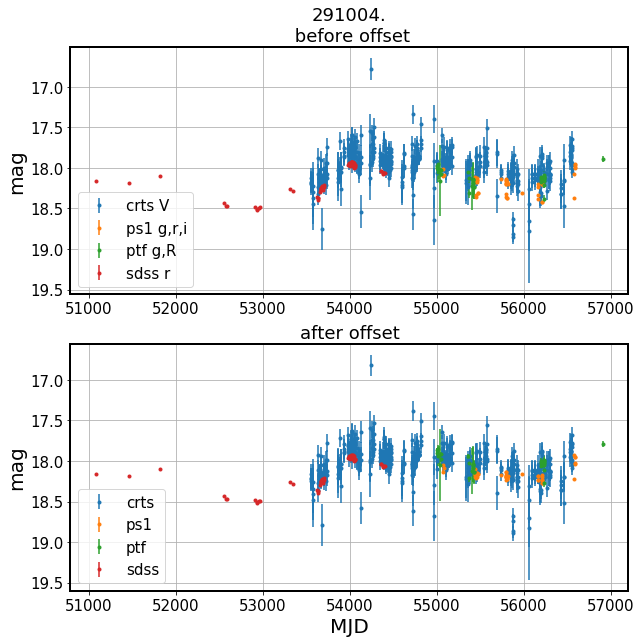

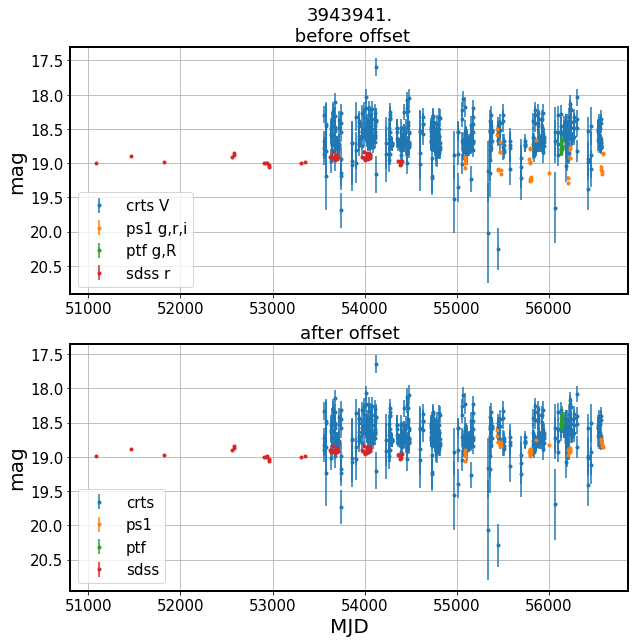

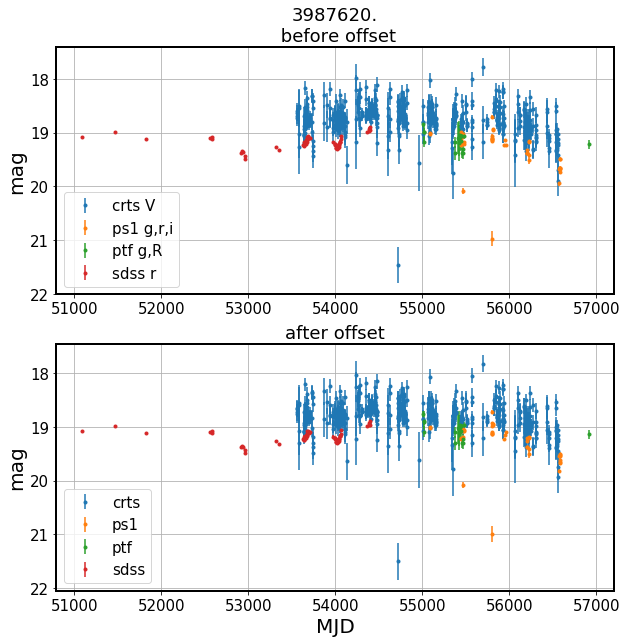

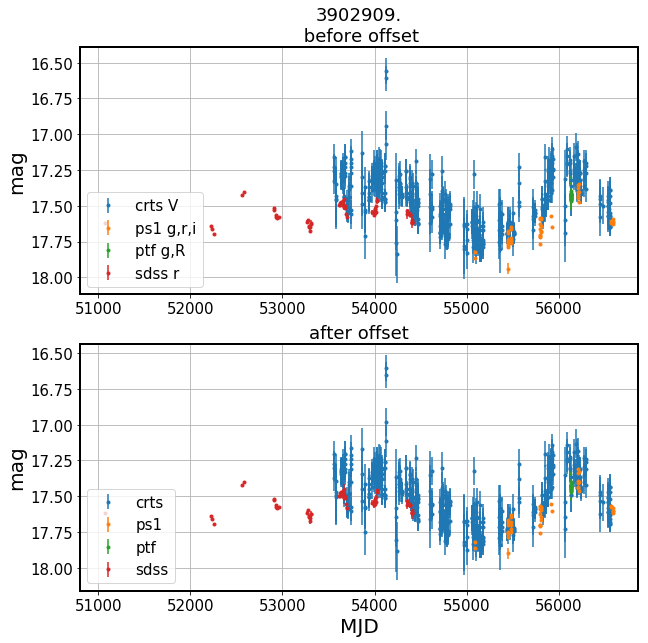

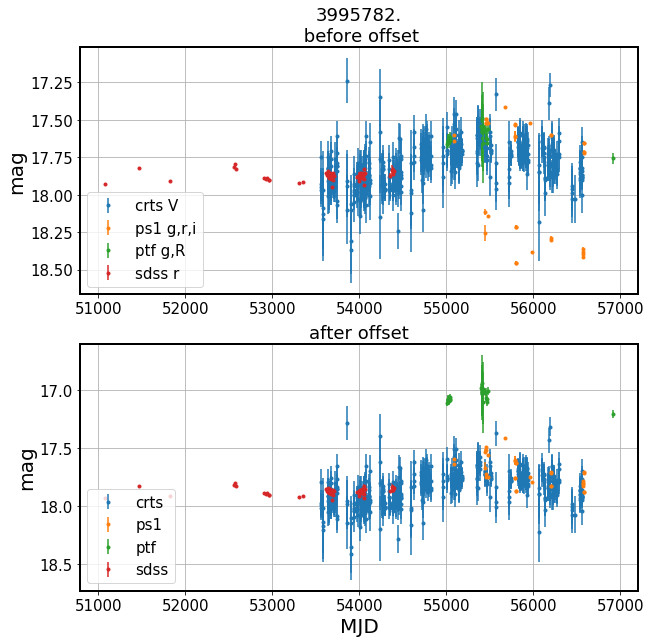

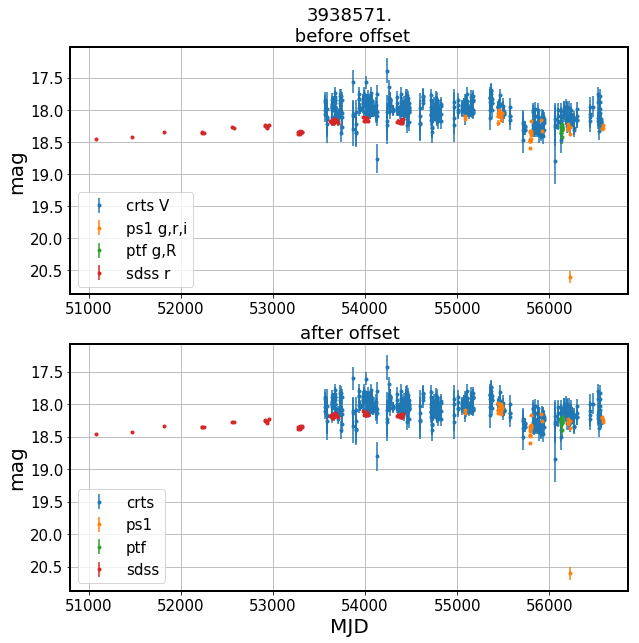

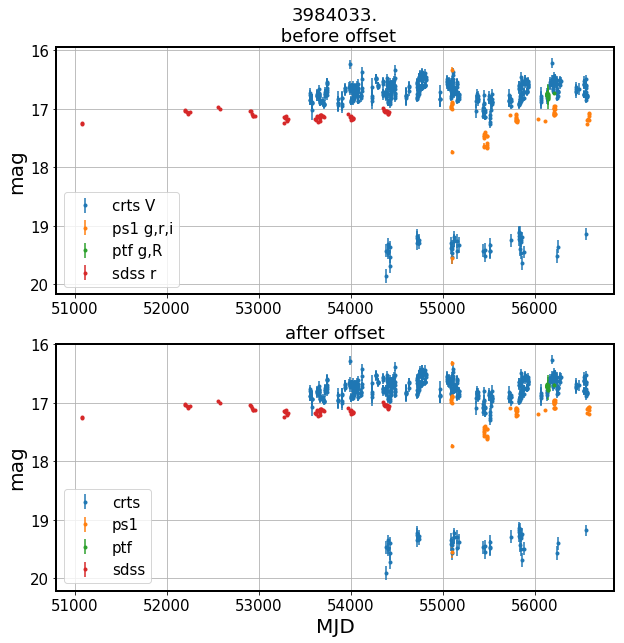

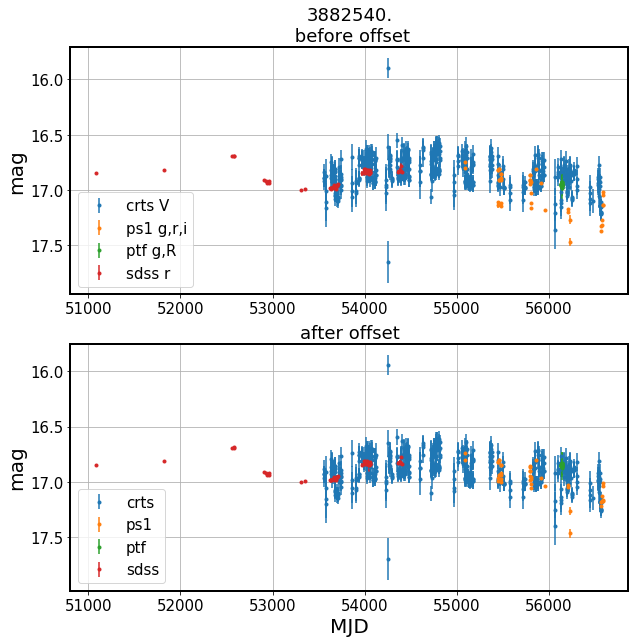

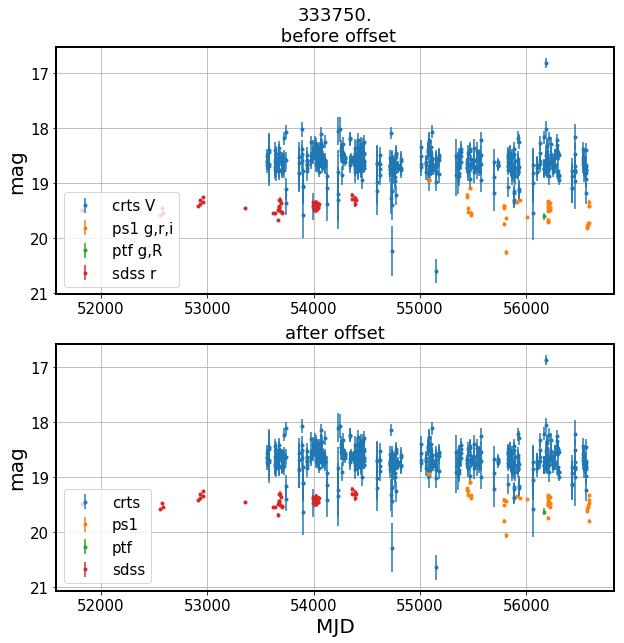

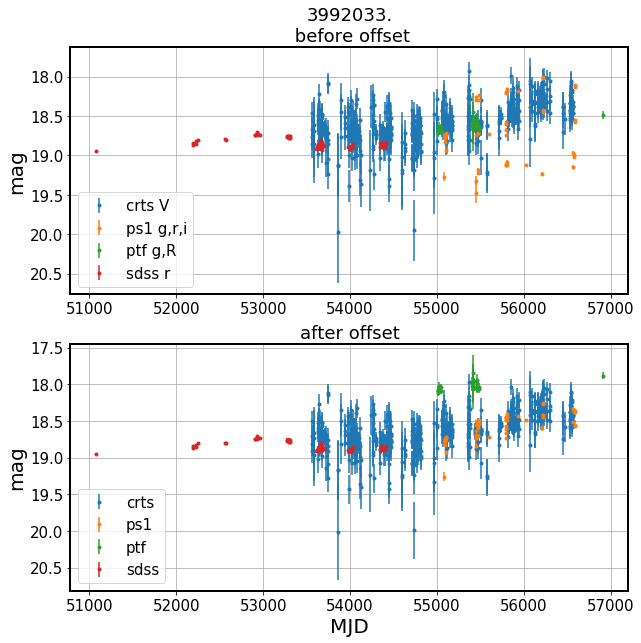

In [161]:
%matplotlib inline
beforeDir = '../data_products/SDSS-PTF-CRTS-PS1_/' # combined LCs before offset
afterDir = '../data_products/Combined_LC/'  # combined LCs after offset ...

for lcname in summary['lcname'][-10:]:
    print()
    lc0 = Table.read(beforeDir  + lcname, format='ascii')
    lc1 = Table.read(afterDir  + lcname, format='ascii')
    
    # illustrate the offset : before and after ... 
    fig,axs  = plt.subplots(2,1,figsize = (10,10))
    ax = np.ravel(axs)
    
    # Before : plot only PTFgR (all PTF),  SDSSr (1 of 5) ,  PS1gri (3 of 5 ),
    # all CRTS 
    masks = {'ptf': lc0['survey'] == 'ptf',
            'sdss' : (lc0['survey'] == 'sdss') &(lc0['filter'] == 'r'),
            'ps1':(lc0['survey'] == 'ps1')  & np.in1d(lc0['filter'], ['g','r','i']),
            'crts':lc0['survey'] == 'crts'}
    
    labels = {'ptf':'g,R', 'sdss':'r', 'ps1':'g,r,i', 'crts':'V'}
    
    for survey in np.unique(lc0['survey']):
        
        # before 
        m = masks[survey]
        ax[0].errorbar(lc0['mjd'][m], lc0['mag'][m], lc0['magerr'][m], 
                label=survey+' '+labels[survey], fmt=".", capsize=0)
        # after
        m = lc1['originSurvey'] == survey
        ax[1].errorbar(lc1['mjd'][m], lc1['mag'][m], lc1['magerr'][m], 
                label=survey, fmt=".", capsize=0)
        
    
        
    # flag 3 sigma outliers , in the context of the entire light curve 
    #m = np.abs(np.mean(lc['mag']) - lc['mag']) > 3 * np.std(lc['mag'])
    #ax.scatter(lc['mjd'][m], lc['mag'][m],
    #           s=100, facecolors='none', edgecolors='r', label='3'+r'$\sigma$')
    for j in range(len(ax)):
        ax[j].legend(loc='lower left', fontsize=15)
        ax[j].set_ylabel('mag')
        ax[j].grid()
        ax[j].invert_yaxis()
    ax[0].set_title( lcname[:-3] + '\n before offset')
    ax[1].set_title('after offset')
    ax[1].set_xlabel('MJD')
    plt.savefig('../data_products/Offsets_tests/'+'Quasars_'+lcname[:-3] + '.png', 
                bbox_inches='tight')
    
    

Plot SDSS, define seasons ... 

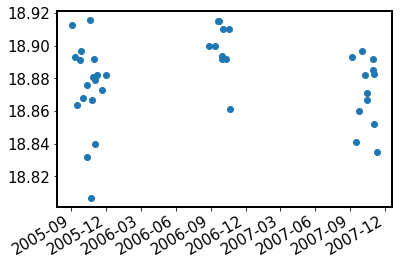

In [60]:
# Rotate axis labels for dates :
# recipe from https://matplotlib.org/1.3.1/users/recipes.html

m = (lc0['survey'] == 'sdss' ) &  (lc0['filter'] =='r') & (lc0['mjd'] > 53500)
t = Time(lc0['mjd'][m], format='mjd')
fig,ax = plt.subplots()
plt.plot_date(t.datetime, lc0['mag'][m])
from astropy.time import Time
import matplotlib.dates as mdates
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

0.18
0.19
0.1465


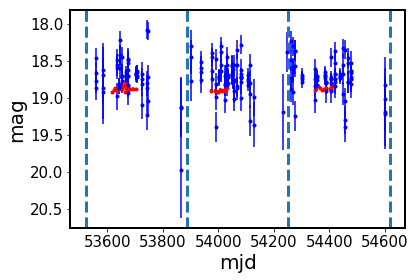

In [93]:
# Rotate axis labels for dates :
# recipe from https://matplotlib.org/1.3.1/users/recipes.html

m = (lc0['survey'] == 'sdss' ) &  (lc0['filter'] =='r') & (lc0['mjd'] > 53500)
mjd = lc0['mjd'][m]
mag = lc0['mag'][m]
err = lc0['magerr'][m]

t = Time(mjd, format='mjd')
fig,ax = plt.subplots()

seasons = Time(['2005-06-01', '2006-06-01', '2007-06-01', '2008-06-01'])
m = (lc0['survey'] == 'crts' ) & (lc0['mjd'] > 53500)
mjd0 = lc0['mjd'][m]
mag0 = lc0['mag'][m]
err0 = lc0['magerr'][m]

for season in seasons : 
    plt.axvline(season.mjd, ls='--', lw=3)
    
# store : per lcname  :  s1N,  s2N, s3N   , s1medsdss,  s2medsdss , s3medsdss 
# s1medcrts  , s2medcrts  , s3medcrts  ,  mean_delta  : 

results = {'lcname':[], 's1N':[], 's2N':[], 's3N':[],
           's1medsdss':[], 's2medsdss':[], 's3medsdss':[],
           's1medcrts':[], 's2medcrts':[], 's3medcrts':[],
            }
for i in range(len(seasons) - 1):
    #  plot the SDSS 
    mask = (seasons[i].mjd  <mjd ) & (mjd < seasons[i+1].mjd)
    plt.errorbar(mjd[mask], mag[mask], err[mask], fmt=".", capsize=0, c='red')
    med_sdss = np.median(mag[mask])
    # summary[]
    # plot CRTS 
    mask = (seasons[i].mjd  <mjd0 ) & (mjd0 < seasons[i+1].mjd)
    plt.errorbar(mjd0[mask], mag0[mask], err0[mask], fmt=".", capsize=0, c='blue')
    med_crts  = np.median(mag0[mask])
    
    # delta
    d = med_sdss - med_crts
    print(d)
plt.xlabel('mjd')
plt.ylabel('mag')
ax.invert_yaxis()

The code below needs to be run for all LCs....

In [157]:
500 % 100

0

In [159]:
# Loop over many light curves ...
beforeDir = '../data_products/SDSS-PTF-CRTS-PS1_/' # combined LCs before offset
afterDir = '../data_products/Combined_LC/'  # combined LCs after offset ...

before = {'lcname':[], 's1Nsdss':[], 's2Nsdss':[], 's3Nsdss':[],
          's1Ncrts':[], 's2Ncrts':[], 's3Ncrts':[],
           's1medsdss':[], 's2medsdss':[], 's3medsdss':[],
           's1medcrts':[], 's2medcrts':[], 's3medcrts':[],
            }

after = {'lcname':[], 's1Nsdss':[], 's2Nsdss':[], 's3Nsdss':[],
          's1Ncrts':[], 's2Ncrts':[], 's3Ncrts':[],
           's1medsdss':[], 's2medsdss':[], 's3medsdss':[],
           's1medcrts':[], 's2medcrts':[], 's3medcrts':[],
            }
j = 0 
for lcname in summary['lcname']:
    if ( j % 100) == 0 : 
        print(j)
    lc0 = Table.read(beforeDir  + lcname, format='ascii')
    lc1 = Table.read(afterDir  + lcname, format='ascii')
    
    # Before : plot only PTFgR (all PTF),  SDSSr (1 of 5) ,  PS1gri (3 of 5 ),
    # all CRTS 
    masks = {'ptf': lc0['survey'] == 'ptf',
            'sdss' : (lc0['survey'] == 'sdss') &(lc0['filter'] == 'r'),
            'ps1':(lc0['survey'] == 'ps1')  & np.in1d(lc0['filter'], ['g','r','i']),
            'crts':lc0['survey'] == 'crts'}
    
    labels = {'ptf':'g,R', 'sdss':'r', 'ps1':'g,r,i', 'crts':'V'}
    
    seasons = Time(['2005-06-01', '2006-06-01', '2007-06-01', '2008-06-01'])
    # store : per lcname  :  s1N,  s2N, s3N   , s1medsdss,  s2medsdss , s3medsdss 
    # s1medcrts  , s2medcrts  , s3medcrts  ,  mean_delta  : 

    before['lcname'].append(lcname)
    after['lcname'].append(lcname)
    
    for survey in ['sdss','crts']:
        
        # before : choose points from first light curve 
        m = masks[survey]
        mjd0 = lc0[m]['mjd']
        mag0 = lc0[m]['mag']
        
        # after : choose points from another light curve 
        m = lc1['originSurvey'] == survey
        mjd1 = lc1[m]['mjd']
        mag1 = lc1[m]['mag']
        
        for i in range(len(seasons) - 1):
            #  calculate median for light curve before offset 
            mask = (seasons[i].mjd  < mjd0 ) & (mjd0 < seasons[i+1].mjd)
            key = 's'+str(i+1)+'med'+survey
            before[key].append(np.median(mag0[mask]))
            before['s'+str(i+1)+'N'+survey].append(np.sum(mask))
            
            #  calculate median for light curve after offset 
            mask = (seasons[i].mjd  < mjd1 ) & (mjd1 < seasons[i+1].mjd)
            key = 's'+str(i+1)+'med'+survey
            after[key].append(np.median(mag1[mask]))
            after['s'+str(i+1)+'N'+survey].append(np.sum(mask))
    j += 1 

0


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2906: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100
200
300
400
500
600
700
800
900
1000


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400


And in the code below we need to specify that we only want delta whenever number of points is larger than 3 per season .... 

In [127]:
np.sum(a['s1Nsdss'] < 4)

11

In [163]:
b = Table(before)
a = Table(after)
len(a)

6444

5607
5607


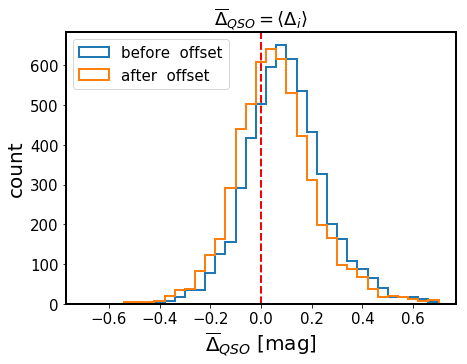

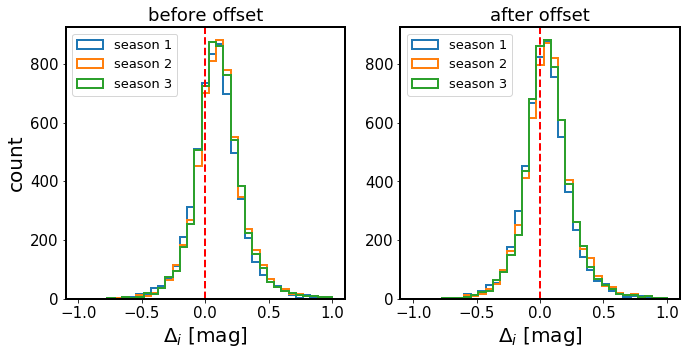

In [173]:
# calculate the seasonal differences 
for i in ['1','2','3']:
    b['d'+i] = b['s'+i+'medsdss'] - b['s'+i+'medcrts']
    a['d'+i] = a['s'+i+'medsdss'] - a['s'+i+'medcrts']
    
# calculate the mean seasonal difference ... 
b['meand'] = ( b['d1'] + b['d2'] + b['d3'] ) /3.0
a['meand'] = ( a['d1'] + a['d2'] + a['d3'] ) /3.0

Nmin = 3
fig,ax  = plt.subplots(1,1,figsize=(7,5))
for p,l in zip([b, a],
               ['before', 'after']):
    m1 = np.bitwise_not(np.isnan(p['meand']))
    #print(np.sum(m1))
    m2 = (p['s1Nsdss'] > Nmin) & (p['s2Nsdss']>Nmin) & (p['s3Nsdss'] > Nmin)
    m3 = (p['s1Ncrts'] > Nmin) & (p['s2Ncrts']>Nmin) & (p['s3Ncrts'] > Nmin)
    #print(np.sum(m2))
    #print(np.sum(m3))
    m = m1 & m2 & m3 
    print(np.sum(m))
    ax.hist(p[m]['meand'], histtype='step', lw=2,bins=35, label=l + '  offset',
           range=(-0.7,0.7))
    ax.axvline(0,ls='--',lw=2,c='red')
ax.set_xlabel(r'$\overline{\Delta}_{QSO}$ [mag]')
ax.set_ylabel('count')
ax.legend(fontsize=15, loc='upper left')
ax.set_title(r'$\overline{\Delta}_{QSO} = \langle \Delta_{i}  \rangle $')
plt.savefig('../data_products/Offsets_tests/QSO_CRTS_SDSS_offset_test_mean_Delta.png', 
            bbox_inches='tight')

fig,axs  = plt.subplots(1,2,figsize=(11,5))
ax = np.ravel(axs)
i = 0 
for p,l in zip([b, a],['before', 'after']):
    
    for s in '123':
        # choose those seasons where both CRTS and SDSS had more 
        # observations than N 
        m = (p['s'+s+'Nsdss'] > Nmin) & (p['s'+s+'Ncrts'] > Nmin)
        ax[i].hist(p[m]['d'+s] ,histtype='step', lw=2,bins=35, label='season '+s,
                  range=(-1,1))
    ax[i].legend(fontsize=13, loc='upper left')
    ax[i].set_xlabel(r'$\Delta_{i}$ [mag]')
    ax[i].set_title(l+' offset')
    ax[i].axvline(0.0,ls='--',lw=2,c='red')
    i += 1 
ax[0].set_ylabel('count')
plt.savefig('../data_products/Offsets_tests/QSO_CRTS_SDSS_offset_test_seasonal_Deltas.png', 
            bbox_inches='tight')

In [134]:
p[m]

lcname,s1Nsdss,s2Nsdss,s3Nsdss,s1Ncrts,s2Ncrts,s3Ncrts,s1medsdss,s2medsdss,s3medsdss,s1medcrts,s2medcrts,s3medcrts,d1,d2,d3,meand
str11,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1503352.txt,19,21,7,52,68,32,17.279,17.386,17.494,17.225,17.315,17.45,0.054,0.071,0.044,0.0563333333333
240884.txt,18,10,13,55,54,52,19.248,19.029,19.156,19.1,18.965,19.05,0.148,0.064,0.106,0.106
3871916.txt,18,10,12,38,60,54,18.8385,19.002,18.9385,18.735,18.86,18.805,0.1035,0.142,0.1335,0.126333333333
547848.txt,16,9,12,38,49,37,19.142,19.048,19.025,19.005,19.0,18.95,0.137,0.048,0.075,0.0866666666667
241736.txt,18,9,13,57,54,52,18.619,18.676,18.696,18.5,18.545,18.6,0.119,0.131,0.096,0.115333333333
392010.txt,16,18,6,40,47,50,19.1895,19.283,19.2845,19.07,19.19,19.27,0.1195,0.093,0.0145,0.0756666666667
295305.txt,17,19,7,42,40,56,19.141,18.786,18.896,18.71,18.425,18.505,0.431,0.361,0.391,0.394333333333
1862125.txt,20,12,9,56,56,44,17.9285,18.0145,17.918,17.93,17.98,17.88,-0.0015,0.0345,0.038,0.0236666666667
1440718.txt,18,18,6,56,56,44,17.392,17.4155,17.405,17.31,17.34,17.36,0.082,0.0755,0.045,0.0675


In [ ]:
# Now , plot the histogram of seasonal differences , delta_i 



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

(array([  18.,  110.,  191.,  103.,   38.,   18.,    5.,    0.,    3.,    2.]),
 array([-0.19183333, -0.06855   ,  0.05473333,  0.17801667,  0.3013    ,
         0.42458333,  0.54786667,  0.67115   ,  0.79443333,  0.91771667,
         1.041     ]),
 <a list of 10 Patch objects>)

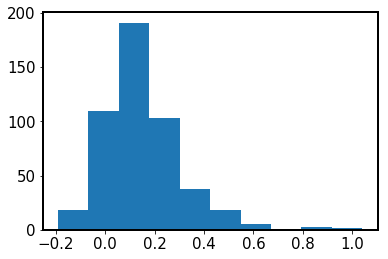